# Coffee Shop Sales Analysis

## Objective
Perform exploratory data analysis (EDA) on coffee shop transactional data to understand:
- Understand overall business performance
- Identify key revenue drivers (stores, categories, products)
- Analyze customer behavior across time
- Generate actionable business insights


Import libraries

In [91]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format','{:.2f}'.format)

#plot style
sns.set(style="whitegrid")

load dataset

In [92]:
file_path = "Coffee Shop Sales.xlsx"
df = pd.read_excel(file_path)

Initial Inspection

In [93]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [94]:
df.shape

(149116, 11)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [96]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.00,149116,149116.00,149116.00,149116.00,149116.00
mean,74737.37,2023-04-15 11:50:32.173609984,1.44,5.34,47.92,3.38
min,1.00,2023-01-01 00:00:00,1.00,3.00,1.00,0.80
25%,37335.75,2023-03-06 00:00:00,1.00,3.00,33.00,2.50
50%,74727.50,2023-04-24 00:00:00,1.00,5.00,47.00,3.00
75%,112094.25,2023-05-30 00:00:00,2.00,8.00,60.00,3.75
max,149456.00,2023-06-30 00:00:00,8.00,8.00,87.00,45.00
std,43153.60,NaN,0.54,2.07,17.93,2.66


Data quality checks

In [97]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [98]:
df.duplicated().sum()

np.int64(0)

Feature Enginerring 

In [99]:
df['revenue'] = df['transaction_qty'] * df['unit_price']

In [115]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df['hour'] = pd.to_datetime(df['transaction_time'],format='%H:%M:%S').dt.hour
df['day'] = df['transaction_date'].dt.day
df['month'] = df['transaction_date'].dt.month
df['weekday'] = df['transaction_date'].dt.day_name()

Key Business KPIs

In [143]:
total_revenue = df['revenue'].sum()
total_transaactions = df['transaction_id'].nunique()
avg_order_value = total_revenue / total_transaactions

total_revenue, total_transaactions, avg_order_value

(np.float64(698812.3300000001), 149116, np.float64(4.6863671906435265))

### Category-Level Performance Analysis

C:\Users\vijay\AppData\Local\Temp\ipykernel_4024\2874434445.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


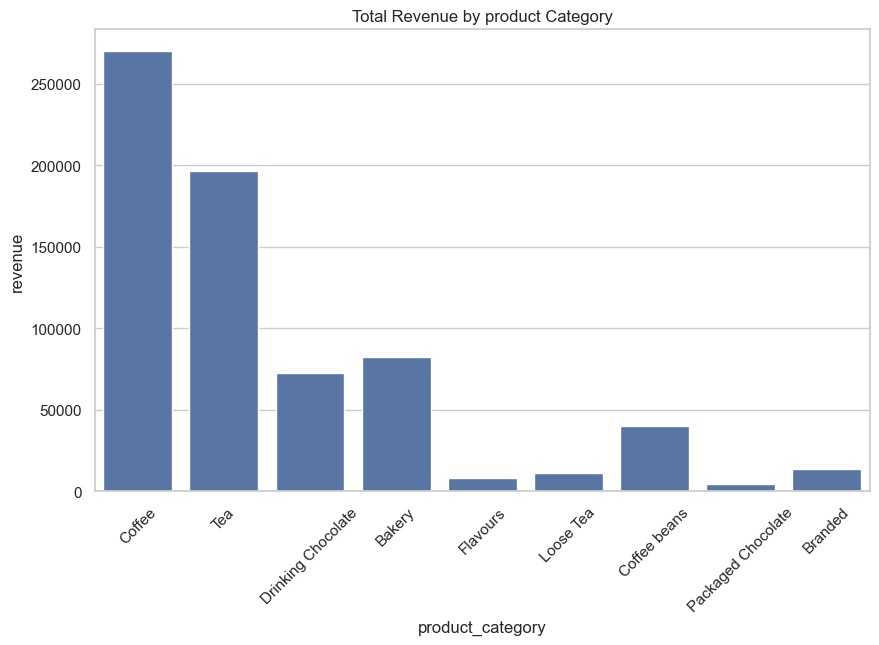

In [126]:
# Revenue by product category
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='product_category',
    y='revenue',
    estimator=sum,
    ci=None
    )
plt.title('Total Revenue by product Category')
plt.xticks(rotation=45)
plt.show()


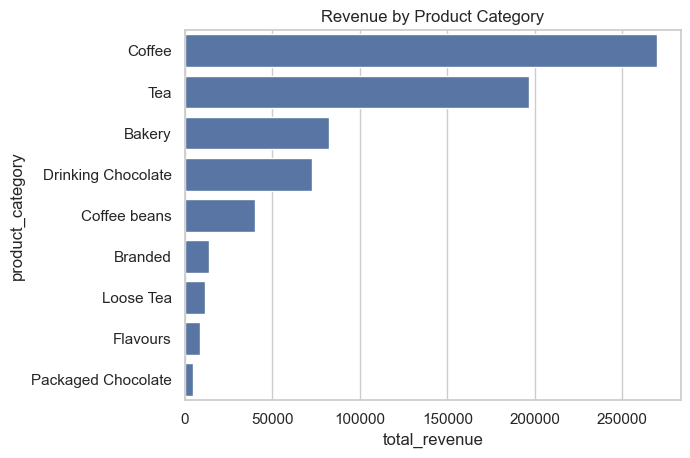

In [158]:
# Revenue in sorted format
category_perf = (
    df.groupby('product_category',as_index=False)
    .agg(
        total_revenue = ('revenue','sum'),
        total_quantity = ('transaction_qty','sum'),
        transaction = ('transaction_id','nunique')
    )
    .sort_values(by='total_revenue',ascending=False)
)
category_perf

plt.Figure(figsize=(10,6))
sns.barplot(data=category_perf,y='product_category',x='total_revenue')
plt.title('Revenue by Product Category')
plt.show()

A small number of product categories contribute a majority of total revenue, indicating strong revenue concentration. Coffee-related categories dominate compared to others.

### Store-Wise Performance Analysis

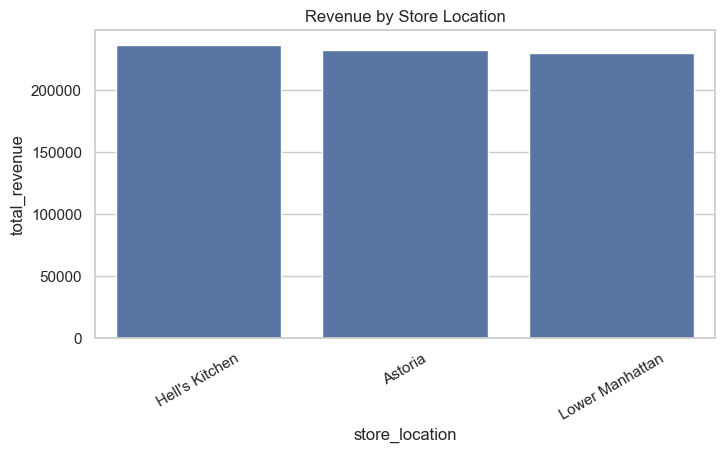

In [164]:
store_perf = (
df.groupby('store_location', as_index=False)
.agg(
total_revenue=('revenue', 'sum'),
transactions=('transaction_id', 'nunique')
)
.sort_values(by='total_revenue', ascending=False)
)
store_perf

plt.figure(figsize=(8,4))
sns.barplot(data=store_perf, x='store_location', y='total_revenue')
plt.title('Revenue by Store Location')
plt.xticks(rotation=30)
plt.show()

### Time-of-Day Sales Analysis

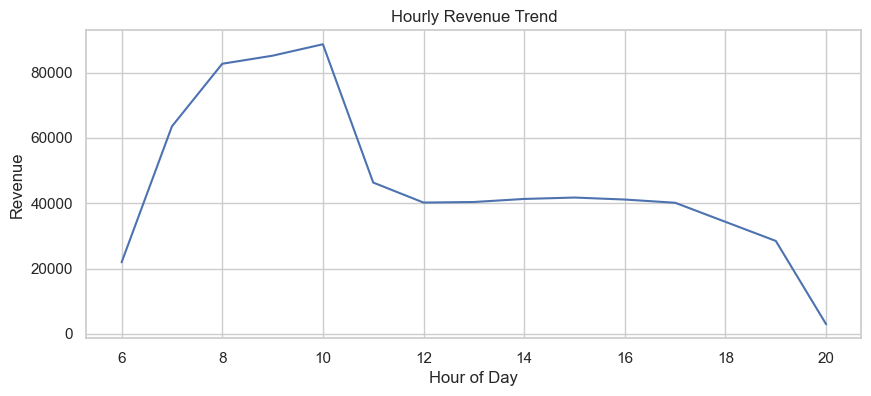

In [110]:
hourly_sales = df.groupby('hour')['revenue'].sum().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=hourly_sales, x='hour', y='revenue')
plt.title('Hourly Revenue Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Revenue')
plt.show()


- Sales are highest in the morning and early afternoon.
- Sales are low during late evening hours.

### Weekday and Weekend Analysis

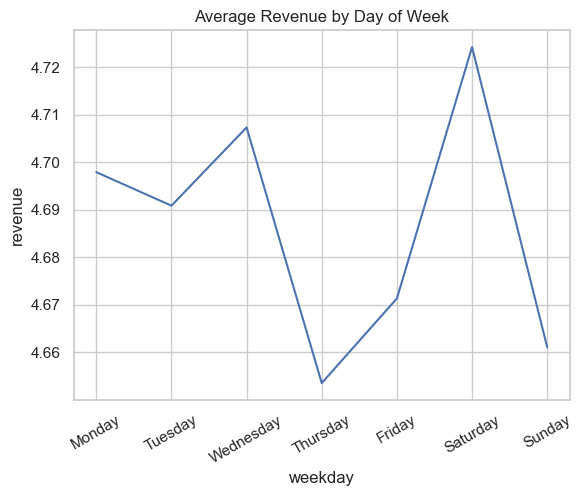

In [131]:
weekday_sales = df.groupby('weekday')['revenue'].mean().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
]).reset_index()

plt.Figure(figsize=(10,4))
sns.lineplot(data=weekday_sales,x='weekday',y='revenue')
plt.title('Average Revenue by Day of Week')
plt.xticks(rotation=30)
plt.show()

- Sales change depending on the day of the week.
- Some days have more customer spending than others.

### Product-Level Analysis

<Axes: xlabel='total_revenue', ylabel='product_detail'>

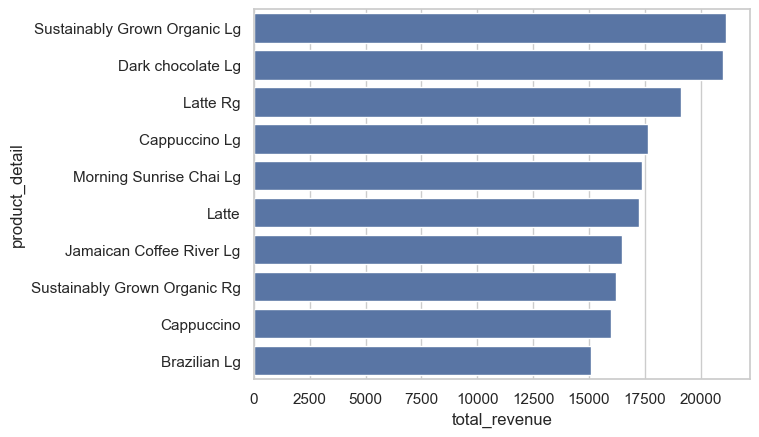

In [167]:
top_product = (df.groupby('product_detail',as_index=False)
               .agg(total_revenue=('revenue','sum'))
               .sort_values(by='total_revenue',ascending=False)
               .head(10)
               )
top_product

plt.Figure(figsize=(10,5))
sns.barplot(data=top_product, x='total_revenue', y='product_detail')

- Only a few products earn most of the money.
- Most products individually contribute only a minor portion of overall sales.


 ### Basket Size & Order Value Analysis

In [153]:
basket_metrics = df.groupby('transaction_id').agg(
basket_qty=('transaction_qty', 'sum'),
basket_revenue=('revenue', 'sum')
)

basket_metrics.describe()

,basket_qty,basket_revenue
count,149116.00,149116.00
mean,1.44,4.69
std,0.54,4.23
min,1.00,0.80
25%,1.00,3.00
50%,1.00,3.75
75%,2.00,6.00
max,8.00,360.00


- Most customers buy only one or two items at a time.
- Big orders happen less often.